In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [2]:
img = image.load_img("data/training/ALL/Im002_1.tif")

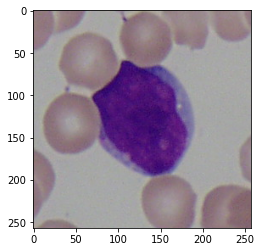

In [3]:
plt.imshow(img)

In [4]:
cv2.imread("data/training/ALL/Im002_1.tif")

array([[[128, 122, 145],
        [126, 122, 147],
        [126, 122, 147],
        ...,
        [128, 128, 152],
        [124, 124, 148],
        [119, 119, 143]],

       [[125, 123, 145],
        [126, 122, 147],
        [126, 122, 147],
        ...,
        [129, 125, 150],
        [126, 123, 145],
        [123, 119, 144]],

       [[126, 124, 146],
        [125, 123, 145],
        [126, 123, 145],
        ...,
        [130, 121, 147],
        [129, 121, 144],
        [129, 121, 144]],

       ...,

       [[163, 165, 173],
        [160, 166, 173],
        [156, 164, 171],
        ...,
        [112, 100, 130],
        [110, 100, 130],
        [116, 106, 136]],

       [[163, 166, 174],
        [159, 165, 170],
        [152, 163, 167],
        ...,
        [115, 103, 133],
        [110, 101, 128],
        [114, 105, 132]],

       [[156, 159, 173],
        [154, 157, 171],
        [155, 155, 171],
        ...,
        [116, 101, 133],
        [116, 101, 132],
        [118, 103, 134]]

In [5]:
cv2.imread("data/training/ALL/Im002_1.tif").shape

(257, 257, 3)

In [6]:
training = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [7]:
train_dataset = training.flow_from_directory('data/training/',
                                            target_size=(200,200),
                                            batch_size=3,
                                            class_mode= 'binary')
validation_dataset = validation.flow_from_directory('data/validation/',
                                            target_size=(200,200),
                                            batch_size=3,
                                            class_mode= 'binary')

Found 130 images belonging to 2 classes.
Found 130 images belonging to 2 classes.


In [8]:
train_dataset.class_indices

{'ALL': 0, 'Healthy': 1}

In [9]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
# defining convolutional neral network with max pooling
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation= 'relu',input_shape =(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation= 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation= 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation= 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                    ])


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0

In [12]:
model.compile(loss= 'binary_crossentropy',
            optimizer = RMSprop(learning_rate=0.001),
            metrics =['accuracy'])

In [14]:
history = model.fit(
      train_dataset,
      steps_per_epoch=5,  
      epochs=50,
      validation_data = validation_dataset)

Epoch 1/50
5/5 [==============================] - 4s 919ms/step - loss: 0.1356 - accuracy: 1.0000 - val_loss: 1.8451 - val_accuracy: 0.5462
Epoch 2/50
5/5 [==============================] - 4s 905ms/step - loss: 0.3845 - accuracy: 0.8667 - val_loss: 1.5386 - val_accuracy: 0.5308
Epoch 3/50
5/5 [==============================] - 4s 910ms/step - loss: 0.1055 - accuracy: 1.0000 - val_loss: 1.6358 - val_accuracy: 0.5462
Epoch 4/50
5/5 [==============================] - 4s 859ms/step - loss: 0.0179 - accuracy: 1.0000 - val_loss: 2.2271 - val_accuracy: 0.5462
Epoch 5/50
5/5 [==============================] - 4s 911ms/step - loss: 0.0187 - accuracy: 1.0000 - val_loss: 2.3429 - val_accuracy: 0.5462
Epoch 6/50
5/5 [==============================] - 5s 968ms/step - loss: 0.0152 - accuracy: 1.0000 - val_loss: 3.7485 - val_accuracy: 0.5231
Epoch 7/50
5/5 [==============================] - 4s 927ms/step - loss: 0.0244 - accuracy: 1.0000 - val_loss: 2.8746 - val_accuracy: 0.5385
Epoch 8/50
5/5 [====

In [15]:
validation_dataset.class_indices

{'ALL': 0, 'Healthy': 1}

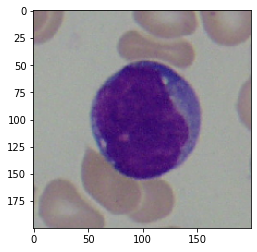

ALL INFECTED


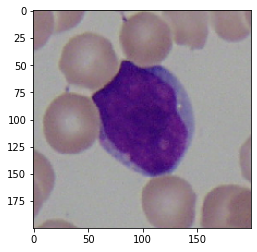

ALL INFECTED


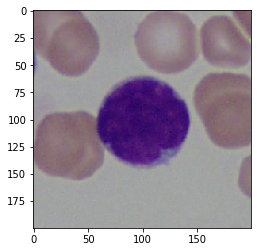

ALL INFECTED


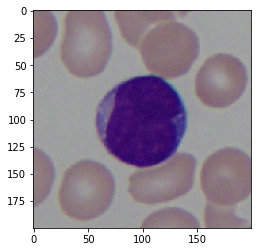

ALL INFECTED


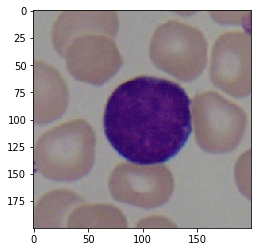

ALL INFECTED


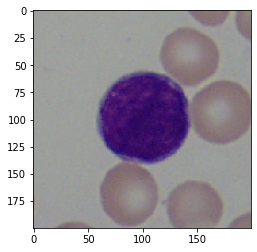

ALL INFECTED


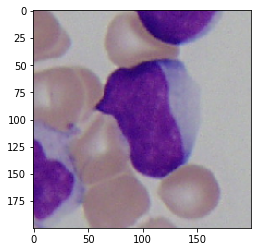

ALL INFECTED


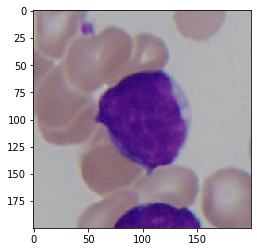

ALL INFECTED


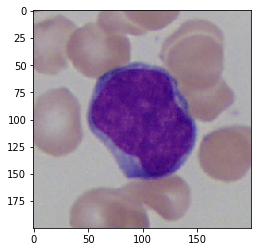

ALL INFECTED


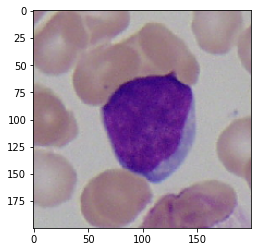

ALL INFECTED


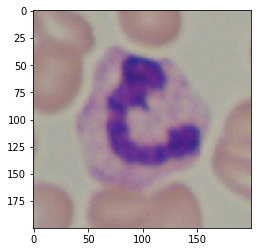

HEALTHY


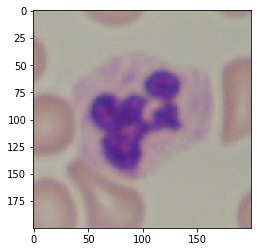

HEALTHY


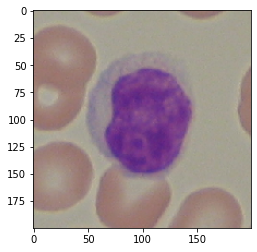

HEALTHY


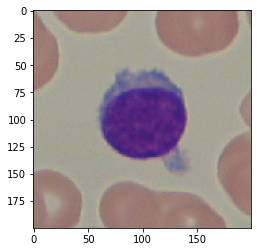

HEALTHY


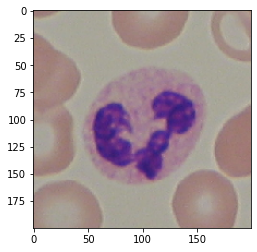

HEALTHY


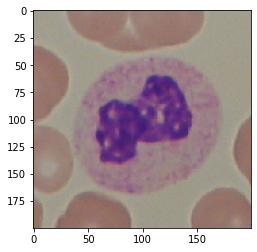

HEALTHY


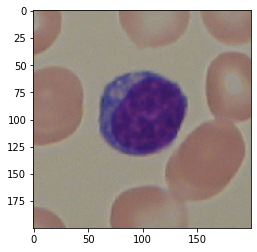

HEALTHY


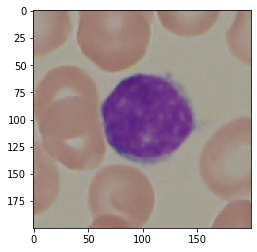

HEALTHY


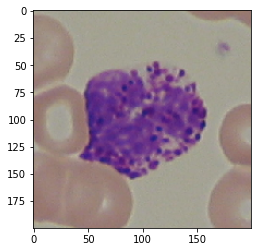

HEALTHY


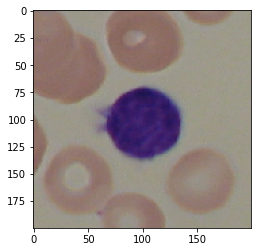

HEALTHY


In [17]:
dir_path = "data/testing"
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+ '//' + i , target_size=(200, 200))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes =model.predict(images)
    if classes[0]==0:
        print("ALL INFECTED")
    else:
        print("HEALTHY")

Saving the model

In [18]:
def save_model_as_json(model):
    """ Saves the model as JSON & SavedModel format"""

    with open('data/model', "w") as file:
        file.write(model.to_json())
        
    model.save("'data/model'")

save_model_as_json(model)

INFO:tensorflow:Assets written to: 'data/model'\assets


Save Weights

In [19]:
def save_weights(model):
    """ Saves the model weights """

    model.save_weights('data/weights')
    print("Weights saved " + 'data/weights')
    
save_weights(model)

Weights saved data/weights


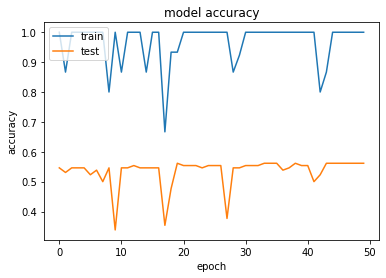

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

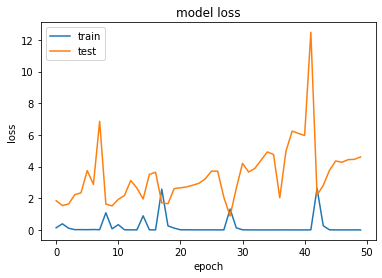

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()